#---------------Creating Random Forest--------------

In [34]:
#Loading the dependancies
import pandas as pd
import numpy as np

#Load the wine dataset from scikit learn
from sklearn.datasets import load_wine

In [35]:
#Let's read a sample the dataset
wine = load_wine(as_frame=True)
print(wine.data.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [36]:
print (wine.data.shape)

(178, 13)


In [37]:
#Show some metrics about the data
print (wine.data.describe())

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

In [38]:
#Looking for missing values
print(wine.data.isnull().sum()) #No missing values YAY!

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


In [39]:
print(wine.data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

#Dont need to encode any caregorical data because everything is numerical. 

In [40]:
#Checking target class names in dataset
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [41]:
#Splitting the data into training and test sets

from sklearn.model_selection import train_test_split

X, y = load_wine( return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
#Implement Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
X, y = load_wine( return_X_y = True)
clf = RandomForestClassifier(n_estimators = 100)

In [43]:
#Training the classifier on the training data
clf.fit(X_train, y_train)

RandomForestClassifier()

In [44]:
#Model Evaluation of trained model
pred = clf.predict(X_test)  #using the test data for evaluation

In [45]:
#Evaluate the accuracy of the model
from sklearn import metrics
print(metrics.accuracy_score(y_test, pred))

1.0


##Looks like I have really good accuracy

In [46]:
#Evaluate using classification report to show precision, recall and F1 score)
print(metrics.classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



#Really good numbers here. It came back perfect. I wasnt expecting that.

#Next,  hyperparameters.  Not sure I need to do this based on the results. What would there be to tune if the score is perfect?  Not sure but I am going to try this anyway

In [53]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV  #Gridsearch is supposed to help find the best parameters to use

param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 
grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid) 
grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_) 


RandomForestClassifier(max_depth=6, max_features='log2', max_leaf_nodes=9,
                       n_estimators=25)


In [56]:
#Changing the parameters to what the gridsearch recommended 
model_random = RandomForestClassifier(max_depth=6, 
                                      max_features='log2', 
                                      max_leaf_nodes=9, 
                                      n_estimators=25) 
#Re-training so we can see how changing the parameters may have effected the scores
model_random.fit(X_train, y_train) 
pred_rand = clf.predict(X_test) 
print(metrics.classification_report(pred_rand, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



#Didnt change anything.  I suppose this means there was nothing to tune. The model was working accurately
from the beginning.

In [61]:
print (wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


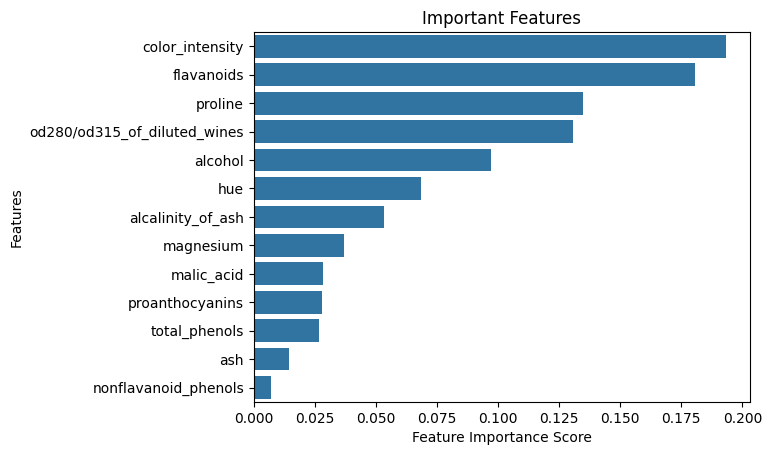

In [74]:
#Lets visualize the feature importance the model gave to each feature
import seaborn as sns
import matplotlib.pyplot as plt

feature_imp = pd.Series(clf.feature_importances_, index=wine.feature_names[:13]).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")
plt.show()

#Based on these results,   the classifier did a good job of recognizing and properly classifying each feature. You can see here that color intensity was the most relevant/important feature,  along with flavonoids and proline. I suppose if you needed to find out what equaled a "quality" wine,  you would only include those most important features in the model to train.  When using the code to look at metrics, there were no real outliers or data that I had to standardize so this dataset was already pretty clean. That makes me feel confident that the classifier was accurate and can be used to predict other questions that we may have about these features of the wine. 